<center>

# 01_Naive Bayes Text Classification
</center>

---


This notebook demonstrates the **application of Naive Bayes algorithm for text classification**, using a real-world dataset. The project covers **all essential steps of classical NLP workflow**, including data preprocessing, feature extraction, model training, evaluation, and prediction.

Naive Bayes is one of the **simplest yet highly effective algorithms** for text classification tasks, such as **spam detection, sentiment analysis, and document categorization**.


### Objectives:

1. Understand the **Naive Bayes algorithm** for text classification.
2. Learn **text preprocessing techniques**:

   * Lowercasing
   * Punctuation removal
   * Stopword removal
3. Apply **feature extraction methods**:

   * Bag of Words (CountVectorizer)
   * TF-IDF (optional)
4. Train and evaluate a **Multinomial Naive Bayes model**.
5. Visualize results using **confusion matrix** and classification report.
6. Make predictions on **new text samples**.

### 📂 Dataset:

* **Source:** SMS Spam Collection Dataset
* **Format:** TSV (Tab Separated Values)
* **Columns:**

  1. `label` → ham or spam
  2. `message` → text message content
* **Size:** 5572 messages


### ⚙️ Libraries & Tools Used:

* Python 3.x
* Pandas & Numpy → Data manipulation
* NLTK → Stopwords & text preprocessing
* Scikit-learn → Feature extraction, model building, evaluation
* Matplotlib & Seaborn → Data visualization


###  Workflow Overview:

1. **Data Loading & Exploration:**

   * Load dataset and inspect basic statistics.
   * Visualize label distribution.

2. **Text Preprocessing:**

   * Lowercase conversion
   * Remove punctuation
   * Remove stopwords

3. **Feature Extraction:**

   * Convert text into numeric representation using **CountVectorizer** or **TF-IDF**.

4. **Model Training:**

   * Train **Multinomial Naive Bayes** classifier on training data.

5. **Evaluation:**

   * Calculate accuracy, precision, recall, and F1-score.
   * Visualize **confusion matrix**.

6. **Prediction on New Text:**

   * Input new text messages and predict spam/ham.


### 🔗 References / Resources:

1. [SMS Spam Collection Dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)
2. [Scikit-learn Naive Bayes Documentation](https://scikit-learn.org/stable/modules/naive_bayes.html)
3. [NLTK Documentation](https://www.nltk.org/)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
import string

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load Example Dataset (SMS Spam Collection)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label','message'])
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Explore Dataset
print("Total messages:", len(df))

Total messages: 5572


In [5]:
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


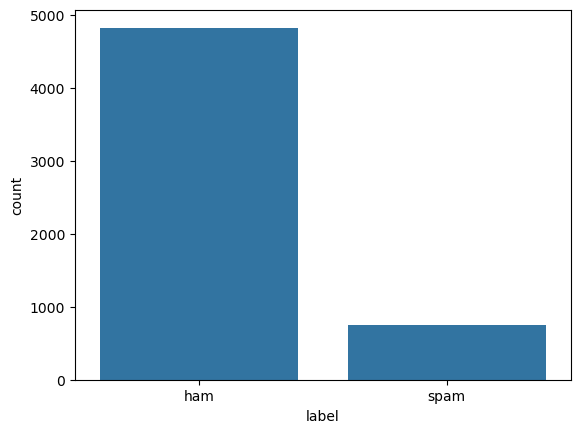

In [6]:
# Visualize label distribution
sns.countplot(x='label', data=df)
plt.show()

In [7]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))

In [8]:
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = ''.join([c for c in text if c not in string.punctuation])  # remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text


In [9]:
df['clean_message'] = df['message'].apply(preprocess_text)
df.head()

,label,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [10]:
# Feature Extraction (Bag of Words / TF-IDF)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_message'])

In [11]:
y = df['label']

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train Naive Bayes Model
# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)


In [14]:
# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9748878923766816

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.98      0.99       966
        spam       0.88      0.95      0.91       149

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.95      1115
weighted avg       0.98      0.97      0.98      1115



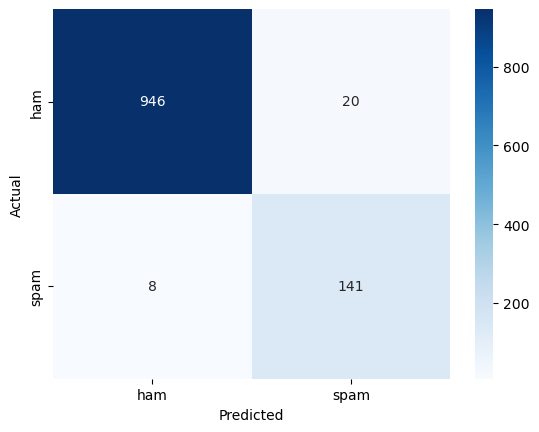

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Predict Example
sample_text = ["Congratulations! You won a $1000 gift card. Click here to claim now."]
sample_clean = [preprocess_text(t) for t in sample_text]
sample_vec = vectorizer.transform(sample_clean)
prediction = mnb.predict(sample_vec)
print("Prediction for sample:", prediction[0])

Prediction for sample: spam


<div style="text-align: right;">
    <b>Author:</b> Monower Hossen <br>
    <b>Date:</b> January 14, 2026
</div>
